## Random Forest using sklearn library 

Step 1: Import Libraries


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load and Split Data


In [3]:
df = pd.read_csv('../../src/data/water_quality.csv')

In [4]:
df.head()

,Ph,Turbidity,Temperature,Conductivity,Label
0,7.01,706.101031,20.529632,342.543917,1
1,7.25,721.232354,25.355915,325.120790,1
2,6.88,596.178640,29.599519,365.238751,1
3,7.89,674.121989,11.838675,259.524332,1
4,8.21,505.266735,14.167877,298.184947,1


In [5]:
# Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Preserve class balance
)

Step 3: Initialize and Train the Model


In [6]:
# Initialize the model with key hyperparameters
model = RandomForestClassifier(
    n_estimators=100,   # Number of trees
    max_depth=10,       # Control tree depth to prevent overfitting
    min_samples_split=5,  # Minimum samples to split a node
    class_weight='balanced',  # Adjust for class imbalance (4500 vs 3999)
    random_state=42     # Reproducibility
)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

Step 4: Evaluate the Model


In [7]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 99.8824

Confusion Matrix:
[[898   2]
 [  0 800]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       800

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



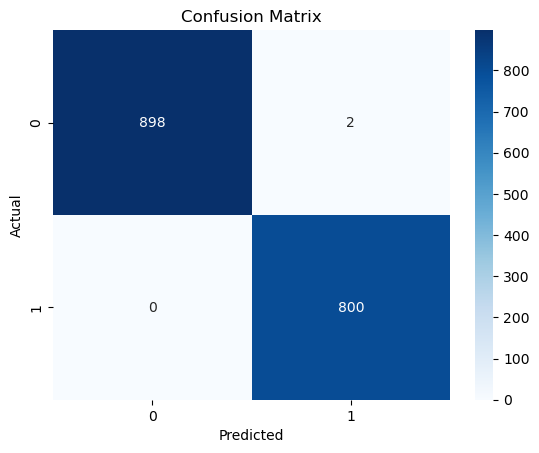

In [10]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Step 5: Feature Importance Analysis



Feature Importances:
        Feature  Importance
1     Turbidity    0.394503
3  Conductivity    0.310608
0            Ph    0.229320
2   Temperature    0.065569


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_6912\568672768.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


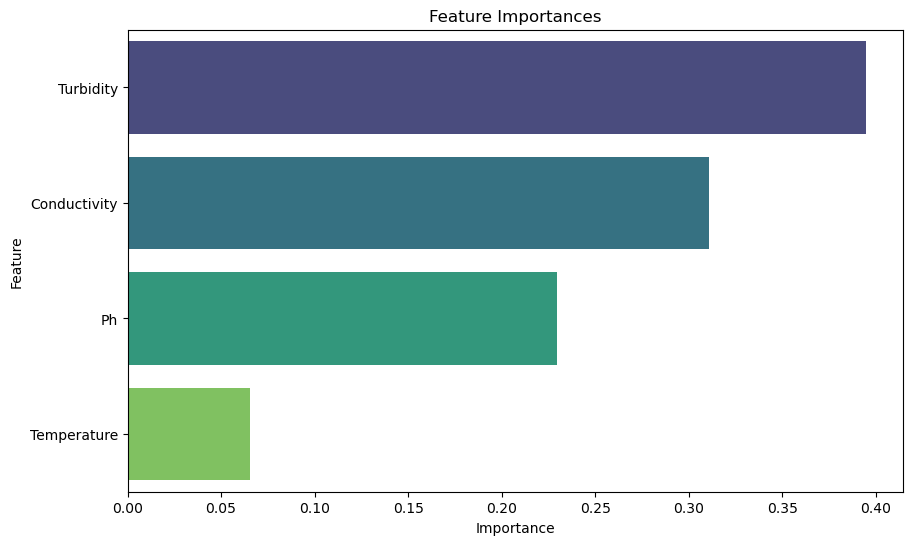

In [8]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.show()